<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_02_%EB%8B%A4%ED%95%AD_%EB%85%BC%EB%A6%AC_%ED%9A%8C%EA%B7%80%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 다운로드

와인 데이터셋: https://www.kaggle.com/brynja/wineuci

In [1]:
# 와인 종류 예측
# 와인의 도수, 산도, 색 등을 이용해서 3개의 클래스로 분류
import os
os.environ['KAGGLE_USERNAME'] = '' # username
os.environ['KAGGLE_KEY'] = '' # key

In [2]:
!kaggle datasets download -d brynja/wineuci

  0% 0.00/4.20k [00:00<?, ?B/s]
100% 4.20k/4.20k [00:00<00:00, 1.67MB/s]


In [3]:
!unzip wineuci.zip

Archive:  wineuci.zip
  inflating: Wine.csv                


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 다항논리회귀: 반드시 1-hot encoder 사용해야 하므로 import 한다.
from sklearn.preprocessing import OneHotEncoder

# 데이터셋 로드

In [5]:
df = pd.read_csv('Wine.csv')

df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# 헤더의 내용을 채워주기

이 데이터셋은 데이터프레임의 헤더가 없는데 헤더의 내용을 채워주도록 하겠습니다. 대다수의 데이터셋에는 각 칼럼에 대한 헤더와 설명이 있으니 걱정마시구요.

In [6]:
# dataset의 header에 이름이 없어서, 직접 넣어준다
# y data는 1, 2, 3으로 나올 것
df = pd.read_csv('Wine.csv', names=[
  'name'
  ,'alcohol'
  ,'malicAcid'
  ,'ash'
  ,'ashalcalinity'
  ,'magnesium'
  ,'totalPhenols'
  ,'flavanoids'
  ,'nonFlavanoidPhenols'
  ,'proanthocyanins'
  ,'colorIntensity'
  ,'hue'
  ,'od280_od315'
  ,'proline'
])

df.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 정답 라벨의 개수 확인

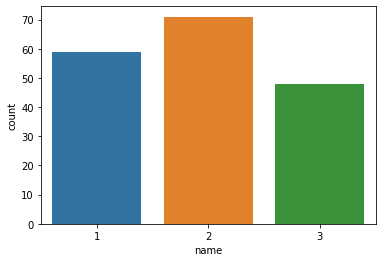

In [ ]:
sns.countplot(x=df['name'])

# 전처리

## 비어있는 행 확인

In [7]:
# 이진 논리 회귀 때처럼 확인.
# 모두 0으로 비어있는 행이 없으면 좋은 데이터!
# 비어있는 행을 지워줄 필요 x
print(df.isnull().sum())

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


## X, y 데이터 분할

In [8]:
# name column만을 제외하고 drop
x_data = df.drop(columns=['name'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
# name만 넣어준다
y_data = df[['name']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,name
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## 데이터 표준화

In [10]:
# 표준화한다!, x data만!
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

# 표준화 하기전과 후 비교
print(x_data.values[0])
print(x_data_scaled[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[ 1.5186119  -0.5622497   0.2320528  -1.1695931   1.9139051   0.8089973
  1.0348189  -0.65956306  1.2248839   0.2517168   0.3621771   1.8479197
  1.013009  ]


## One-hot encoding

In [12]:
# y label data로 one hot encoding
# 1 -> [1 0 0]
# 2 -> [0 1 0]
# 3 -> [0 0 1]
encoder = OneHotEncoder()

# array로 바꿔준다
y_data_encoded = encoder.fit_transform(y_data).toarray()

print(y_data.values[0])
print(y_data_encoded[0])

[1.]
[1. 0. 0.]


# 학습/검증 데이터 분할

In [15]:
# 80% 학습, 20% 검증 데이터(test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data_encoded, test_size=0.2, random_state=2021)

# 142 학습 data, 36개 검증 data, 13: x에서 사용하는 feature data, 3: 와인의 종류 개수
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(142, 13) (36, 13)
(142, 3) (36, 3)


# 모델 학습

In [17]:
model = Sequential([
                    # 와인 세종류를 예측해야하므로 dense: 3, 다항논리회귀이므로 softmax 사용 (sigmoid x) 
  Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20 # epochs 복수형으로 쓰기!
)

# 트레이닝은 100%, 검증은 90%대
# 즉, 어떤 데이터를 넣었을 때, 90%대의 확률로 와인 분류해준다.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
5/5 [==============================] - 1s 41ms/step - loss: 1.4380 - acc: 0.2535 - val_loss: 0.9140 - val_acc: 0.5278
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8239 - acc: 0.6620 - val_loss: 0.5469 - val_acc: 0.7778
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5004 - acc: 0.8239 - val_loss: 0.3706 - val_acc: 0.9444
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.3332 - acc: 0.9085 - val_loss: 0.2884 - val_acc: 0.9167
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.2425 - acc: 0.9507 - val_loss: 0.2423 - val_acc: 0.9167
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1899 - acc: 0.9577 - val_loss: 0.2149 - val_acc: 0.9167
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1560 - acc: 0.9577 - val_loss: 0.1951 - val_acc: 0.9444
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1336 - acc: 0.9577 - val_loss: 